# Data Processing

In this notebook the following tasks will be done:
- Inspect the data and handle inconsistancies and missing values
- Stablish the questions we want to answer with the data

In [9]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
raw_df: pl.DataFrame = pl.read_csv(
    "../data/raw/world-data-2023.csv", ignore_errors=True
)
raw_df = raw_df.rename({"Density\r\n(P/Km2)": "Density(P/Km2)"})  # fix column name

raw_df.head(10)

Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887
"""Antigua and Barbuda""","""223""","""AG""","""20.50%""","""443""","""0""",15.33,1,"""St. John's, Saint John""","""557""",113.81,"""1.20%""","""XCD""",1.99,"""22.30%""","""$0.99 ""","""$1,727,759,259 ""","""105.00%""","""24.80%""",5.0,"""St. John's, Saint John""",76.9,42,"""$3.04 ""","""English""","""24.30%""",2.76,"""97,118""",null,"""16.50%""","""43.00%""",null,"""23,800""",17.060816,-61.796428
"""Argentina""","""17""","""AR""","""54.30%""","""2,780,400""","""105,000""",17.02,54,"""Buenos Aires""","""201,348""",232.75,"""53.50%""","""ARS""",2.26,"""9.80%""","""$1.10 ""","""$449,663,446,954 ""","""109.70%""","""90.00%""",8.8,"""Buenos Aires""",76.5,39,"""$3.35 ""","""Spanish""","""17.60%""",3.96,"""44,938,712""","""61.30%""","""10.10%""","""106.30%""","""9.79%""","""41,339,571""",-38.416097,-63.616672
"""Armenia""","""104""","""AM""","""58.90%""","""29,743""","""49,000""",13.99,374,"""Yerevan""","""5,156""",129.18,"""1.40%""","""AMD""",1.76,"""11.70%""","""$0.77 ""","""$13,672,802,158 ""","""92.70%""","""54.60%""",11.0,"""Yerevan""",74.9,26,"""$0.66 ""","""Armenian""","""81.60%""",4.4,"""2,957,731""","""55.60%""","""20.90%""","""22.60%""","""16.99%""","""1,869,848""",40.069099,45.038189
"""Australia""","""3""","""AU""","""48.20%""","""7,741,220""","""58,000""",12.6,61,"""Canberra""","""375,908""",119.8,"""1

In [24]:
pl.DataFrame(dict(zip(raw_df.columns, raw_df.dtypes)))

Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
String,String,String,String,String,String,Float64,Int64,String,String,Float64,String,String,Float64,String,String,String,String,String,Float64,String,Float64,Int64,String,String,String,Float64,String,String,String,String,String,String,Float64,Float64


## Type conversion

We observed that some of the columns are not in the correct data type. We will convert them to the correct data type

In [25]:
data = raw_df.clone()


def convert_to_numeric(column: pl.Series) -> pl.Series:
    if column.dtype == "object":
        column = column.str.replace(",", "").str.replace("%", "").str.replace("$", "")
    try:
        return column.cast(pl.Float64)
    except:
        return column


numeric_columns = data.drop(
    [
        "Country",
        "Abbreviation",
        "Capital/Major City",
        "Currency-Code",
        "Official language",
        "Largest city",
    ]
).columns
for col in numeric_columns:
    data.with_columns(pl.col(col).map_batches(convert_to_numeric))

data.head(10)

Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887
"""Antigua and Barbuda""","""223""","""AG""","""20.50%""","""443""","""0""",15.33,1,"""St. John's, Saint John""","""557""",113.81,"""1.20%""","""XCD""",1.99,"""22.30%""","""$0.99 ""","""$1,727,759,259 ""","""105.00%""","""24.80%""",5.0,"""St. John's, Saint John""",76.9,42,"""$3.04 ""","""English""","""24.30%""",2.76,"""97,118""",null,"""16.50%""","""43.00%""",null,"""23,800""",17.060816,-61.796428
"""Argentina""","""17""","""AR""","""54.30%""","""2,780,400""","""105,000""",17.02,54,"""Buenos Aires""","""201,348""",232.75,"""53.50%""","""ARS""",2.26,"""9.80%""","""$1.10 ""","""$449,663,446,954 ""","""109.70%""","""90.00%""",8.8,"""Buenos Aires""",76.5,39,"""$3.35 ""","""Spanish""","""17.60%""",3.96,"""44,938,712""","""61.30%""","""10.10%""","""106.30%""","""9.79%""","""41,339,571""",-38.416097,-63.616672
"""Armenia""","""104""","""AM""","""58.90%""","""29,743""","""49,000""",13.99,374,"""Yerevan""","""5,156""",129.18,"""1.40%""","""AMD""",1.76,"""11.70%""","""$0.77 ""","""$13,672,802,158 ""","""92.70%""","""54.60%""",11.0,"""Yerevan""",74.9,26,"""$0.66 ""","""Armenian""","""81.60%""",4.4,"""2,957,731""","""55.60%""","""20.90%""","""22.60%""","""16.99%""","""1,869,848""",40.069099,45.038189
"""Australia""","""3""","""AU""","""48.20%""","""7,741,220""","""58,000""",12.6,61,"""Canberra""","""375,908""",119.8,"""1

Now, we are going to display the percentage of missing values in each column.

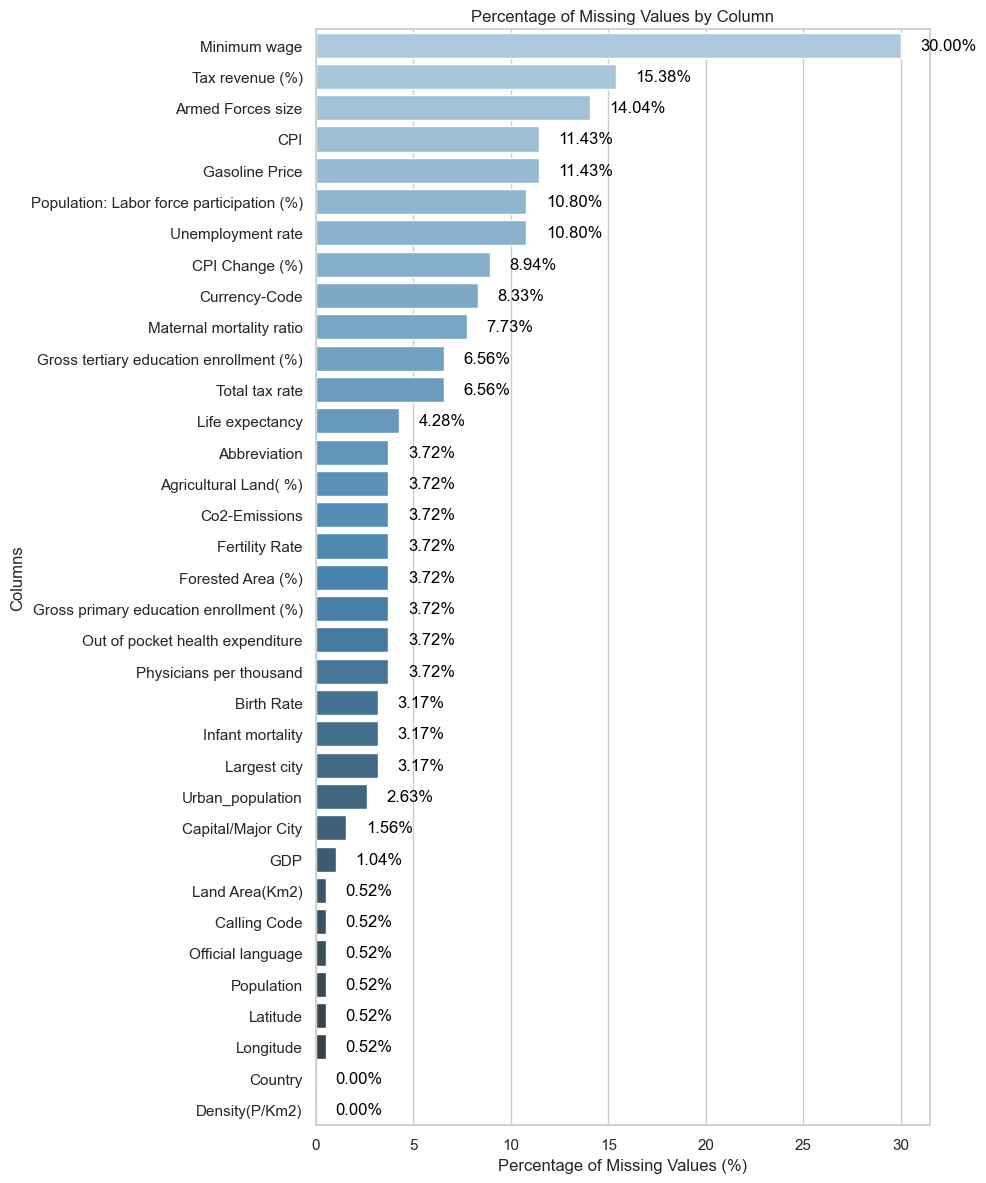

In [27]:
missing_data_summary = (
    data.select(
        [
            ((pl.col(column).is_null().sum() / pl.col(column).count()) * 100).alias(
                column
            )
            for column in data.columns
        ]
    )
    .transpose(include_header=True)
    .sort(by="column_0", descending=True)
)

# with pl.Config(tbl_rows=data.shape[0]):
#     print(missing_data_summary)

columns = missing_data_summary["column"].to_list()
missing_percentages = missing_data_summary["column_0"].to_list()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 12))
ax = sns.barplot(x=missing_percentages, y=columns, palette="Blues_d", hue=columns)

for p in ax.patches:
    ax.text(
        p.get_width() + 1,
        p.get_y() + p.get_height() / 2,
        f"{p.get_width():.2f}%",
        va="center",
        ha="left",
        color="black",
    )

plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values by Column")
plt.tight_layout()
plt.show()

### Missing values analysis

- **Minimum wage:** Some countries do not have a minimum wage, so we will fill the missing values with 0.
- **Tax revenue %:** Some countries do not disclose their tax revenue, so we will fill try to come up with questions that do not require this information.
- **Armed forces size:** Some countries do not disclose their armed forces size. We may fill this data by using the average civilian to military ratio of similar countries.
- **CPIs:** Once more, some countries do not disclose this information.

Based on what we see so far, we propose to first find some questions that can be answered with the data we have, and then we will decide how to handle the missing values.

### Columns to be dropped

- **Abbreviation:** This column is not necessary for our analysis, but keep it saved for visualization purposes
- **Calling Code, Capital/Major City, Largest City, Official language:** These columns do not add any valuable information
- **Minimum wage currency:** This column being kept would depend on the questions we want to answer antnd the feasability to find and fill the missing data
- **Latitude, Longitude:** These columns are not necessary for our analysis, but keep it saved for visualization purposes
- **CPI change:** This column does not add any valuable information